In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hafizothman","key":"62dc749cf0150662d785e7893d555be6"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
mkoklu42/acoustic-extinguisher-fire-dataset                      Acoustic Extinguisher Fire Dataset                 620KB  2022-02-09 17:59:52            228  
mkoklu42/durum-wheat-dataset                                     Durum Wheat Dataset                                983MB  2022-02-18 09:34:17             58  
mkoklu42/grapevine-leaves-image-dataset                          Grapevine Leaves Image Dataset                     109MB  2022-02-09 18:21:40            174  
mkoklu42/rice-image-dataset                                      Rice Image Dataset                                 222MB  2022-02-07 14:32:24            233  
mkoklu42/pumpkin-seeds-dataset          

In [5]:
!kaggle datasets download -d vivek468/superstore-dataset-final

  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 37.8MB/s]


In [6]:
! mkdir superstore

In [7]:
! unzip superstore-dataset-final -d superstore

Archive:  superstore-dataset-final.zip
  inflating: superstore/Sample - Superstore.csv  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date as dt

In [9]:
df = pd.read_csv('/content/superstore/Sample - Superstore.csv', encoding='latin1')

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.shape

(9994, 21)

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
df.iloc[:,5:21].head()

,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Univariate Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #for now, we are not going to touch on shipdate

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [17]:
df.isna().sum() #checking null value

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [18]:
(df==0).sum() #checking 'zero' value

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount         4798
Profit             65
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbb398f890>,
      dtype=object)

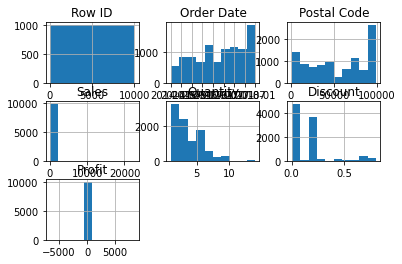

In [19]:
df.hist()

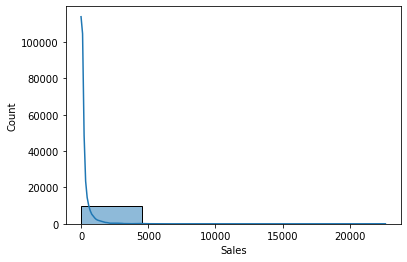

In [20]:
sns.histplot(data=df, x="Sales", bins=5, kde=True)

In [21]:
df_cat = df.select_dtypes(include=['object'])

In [22]:
df_cat.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [23]:
df_ncat = df.select_dtypes(exclude=['object'])

In [24]:
df_ncat.head()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
0,1,2016-11-08,42420,261.9600,2,0.00,41.9136
1,2,2016-11-08,42420,731.9400,3,0.00,219.5820
2,3,2016-06-12,90036,14.6200,2,0.00,6.8714
3,4,2015-10-11,33311,957.5775,5,0.45,-383.0310
4,5,2015-10-11,33311,22.3680,2,0.20,2.5164


In [25]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


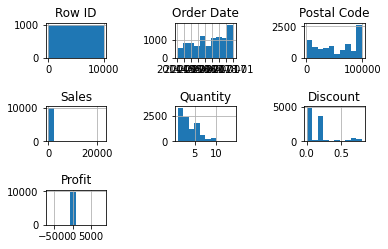

In [27]:
fig, axs = plt.subplots(constrained_layout=True)
fig.set_tight_layout(True)
df_ncat.hist(ax=axs)
plt.show()

In [28]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

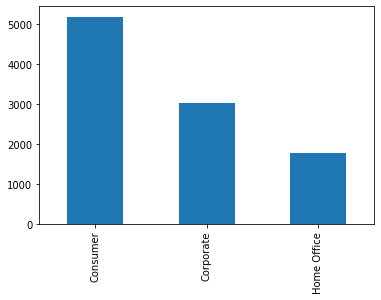

In [29]:
df['Segment'].value_counts().plot(kind='bar')

In [30]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [31]:
df['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [32]:
df['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [33]:
df['orderdate_month'] = df['Order Date'].dt.month

In [41]:
df['orderdate_year'] = df['Order Date'].dt.year

In [42]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,orderdate_month,orderdate_year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


## Bi/Multivariate Analysis

In [44]:
df_crosstab = pd.crosstab(df['orderdate_month'],df['Category'], values=df['Profit'], aggfunc=sum)
df_crosstab

Category,Furniture,Office Supplies,Technology
orderdate_month,,,
1,-1944.2130,6243.7654,4834.8937
2,693.5796,4274.0190,5327.0121
3,771.9875,10455.6295,17367.0702
4,1460.3261,4747.6876,5379.4226
5,2302.2981,9030.0467,11078.9630
6,982.3847,11073.2905,9230.1202
7,1412.6846,2319.0104,10100.9698
8,4.0941,12673.4033,9099.4410
9,5460.0023,17299.2094,14098.2636


In [39]:
df_crosstab_pct = pd.crosstab(df['orderdate_month'],df['Category'], margins=False, normalize='index', values=df['Profit'], aggfunc=sum)
df_crosstab_pct

Category,Furniture,Office Supplies,Technology
orderdate_month,,,
1,-0.212844,0.683541,0.529303
2,0.067373,0.415171,0.517456
3,0.026998,0.365649,0.607353
4,0.126027,0.409727,0.464246
5,0.102729,0.402924,0.494347
6,0.046152,0.520220,0.433628
7,0.102127,0.167647,0.730226
8,0.000188,0.581964,0.417848
9,0.148138,0.469354,0.382508


In [40]:
df_crosstab_pct = pd.crosstab(df['orderdate_month'],df['Category'], margins=False, normalize='columns', values=df['Profit'], aggfunc=sum)
df_crosstab_pct.reset_index()

Category,orderdate_month,Furniture,Office Supplies,Technology
0,1,-0.105370,0.050973,0.033240
1,2,0.037590,0.034893,0.036623
2,3,0.041839,0.085358,0.119398
3,4,0.079145,0.038760,0.036983
4,5,0.124777,0.073720,0.076168
5,6,0.053242,0.090401,0.063457
6,7,0.076563,0.018932,0.069444
7,8,0.000222,0.103464,0.062558
8,9,0.295915,0.141229,0.096925
9,10,-0.164104,0.089226,0.164192


In [38]:
df_crosstab_pct.reset_index().describe()

Category,orderdate_month,Furniture,Office Supplies,Technology
count,12.000000,12.000000,12.000000,12.000000
mean,6.500000,0.083333,0.083333,0.083333
std,3.605551,0.041181,0.038160,0.037890
min,1.000000,0.029703,0.029373,0.032485
25%,3.750000,0.063413,0.068661,0.067407
50%,6.500000,0.069543,0.074179,0.072279
75%,9.250000,0.099364,0.093428,0.095696
max,12.000000,0.154644,0.143545,0.155929


In [53]:
df_crosstab = pd.crosstab(df['orderdate_month'],[df['orderdate_year'],df['Category']], values=df['Profit'], aggfunc=sum)
df_crosstab.reset_index()

orderdate_year orderdate_month       2014                             \
Category                        Furniture Office Supplies Technology   
0                            1   805.4665        788.9506   855.7736   
1                            2   120.6917        176.0910   565.5257   
2                            3 -1128.6550       1270.4133   356.9716   
3                            4   554.3801       1000.2086  1934.2465   
4                            5  -349.8776       1747.2044  1341.3828   
5                            6   596.3153       3031.4326  1348.7765   
6                            7   374.2467      -2482.0172  1266.2879   
7                            8   663.4717       2767.6007  1887.0326   
8                            9  1858.5976       6699.5402  -230.0384   
9                           10   249.1645       1117.6406  2081.4522   
10                          11  -297.8958       4411.9560  5178.0667   
11                          12  2011.8198       2064.3953  4907.3548   

orderdate_year       2015                                  2016  \
Category        Furniture Office Supplies Technology  Furniture   
0              -3014.2000        589.8969  -856.7039   303.9607   
1                394.8948       1814.1018   604.8542   377.0352   
2               1455.0573       5407.8482  2869.1923  -555.2680   
3                338.6502       1477.3596  2371.4864   364.8334   
4                900.5847       1731.6139  2035.6704  1824.4739   
5               -412.6597       2195.3864  1552.8305  -106.2665   
6               -325.0938       1113.7829  2499.9592  1038.9073   
7               -487.4709       2208.7531  3634.5262  -494.1457   
8               1350.1185       2037.8837  4821.1605   702.6025   
9               -605.5163       1090.9375  2331.9448  -144.6600   
10              2992.0240       2800.0289  6682.7355   819.8088   
11               428.8141       2631.9409  4956.2109  2828.6715   

orderdate_year                                   2017                  \
Category       Office Supplies  Technology  Furniture Office Supplies   
0                    1604.4712    916.3914   -39.4402       3260.4467   
1                    1330.0009   3297.5434  -199.0421        953.8253   
2                    1061.4056   3105.8304  1000.8532       2715.9624   
3                   -1100.4821   3713.4636   202.4624       3370.6015   
4                    2397.5024   4440.1701   -72.8829       3153.7260   
5                    2467.4894   2389.1552   904.9956       3378.9821   
6                    1123.9602   2270.0104   324.6244       2563.2845   
7                    1629.1913    927.0237   322.2390       6067.8582   
8                    3714.0417   4912.0134  1548.6837       4847.7438   
9                    4680.0550  11707.7475 -2526.9203       4040.7751   
10                   4686.9250  -1495.3263   406.0637       3609.1029   
11                  11466.6686   3589.9692  1146.7548       1774.3132   

orderdate_year              
Category        Technology  
0                3919.4326  
1                 859.0888  
2               11035.0759  
3               -2639.7739  
4                3261.7397  
5                3939.3580  
6                4064.7123  
7                2650.8585  
8                4595.1281  
9                7761.4207  
10               5674.9371  
11               5562.2788

In [49]:
df_crosstab = pd.crosstab(df['orderdate_month'],[df['orderdate_year'],df['Category']], values=df['Profit'], aggfunc=sum, margins=False, normalize='index')
df_crosstab

orderdate_year       2014                                 2015  \
Category        Furniture Office Supplies Technology Furniture   
orderdate_month                                                  
1                0.088179        0.086371   0.093686 -0.329982   
2                0.011724        0.017105   0.054934  0.038359   
3               -0.039471        0.044428   0.012484  0.050886   
4                0.047843        0.086318   0.166926  0.029226   
5               -0.015612        0.077961   0.059853  0.040184   
6                0.028015        0.142416   0.063365 -0.019387   
7                0.027055       -0.179432   0.091543 -0.023502   
8                0.030467        0.127089   0.086653 -0.022385   
9                0.050427        0.181769  -0.006241  0.036631   
10               0.007839        0.035164   0.065487 -0.019051   
11              -0.008399        0.124391   0.145991  0.084357   
12               0.046388        0.047601   0.113153  0.009888   

orderdate_year                                  2016                  \
Category        Office Supplies Technology Furniture Office Supplies   
orderdate_month                                                        
1                      0.064579  -0.093788  0.033276        0.175651   
2                      0.176219   0.058754  0.036625        0.129194   
3                      0.189121   0.100340 -0.019419        0.037119   
4                      0.127497   0.204660  0.031485       -0.094972   
5                      0.077265   0.090832  0.081409        0.106977   
6                      0.103139   0.072951 -0.004992        0.115922   
7                      0.080518   0.180729  0.075105        0.081254   
8                      0.101426   0.166898 -0.022691        0.074813   
9                      0.055291   0.130806  0.019063        0.100768   
10                     0.034323   0.073368 -0.004551        0.147245   
11                     0.078944   0.188414  0.023114        0.132144   
12                     0.060687   0.114280  0.065223        0.264397   

orderdate_year                  2017                             
Category        Technology Furniture Office Supplies Technology  
orderdate_month                                                  
1                 0.100323 -0.004318        0.356940   0.429083  
2                 0.320317 -0.019335        0.092653   0.083450  
3                 0.108616  0.035001        0.094981   0.385914  
4                 0.320473  0.017473        0.290884  -0.227813  
5                 0.198122 -0.003252        0.140720   0.145540  
6                 0.112242  0.042516        0.158744   0.185070  
7                 0.164105  0.023468        0.185307   0.293849  
8                 0.042569  0.014797        0.278637   0.121728  
9                 0.133270  0.042018        0.131527   0.124673  
10                0.368353 -0.079503        0.127132   0.244192  
11               -0.042159  0.011449        0.101755   0.160000  
12                0.082777  0.026442        0.040912   0.128254

In [50]:
df_crosstab = pd.crosstab(df['orderdate_month'],[df['orderdate_year'],df['Category']], values=df['Profit'], aggfunc=sum, margins=False, normalize='columns')
df_crosstab

orderdate_year       2014                                 2015  \
Category        Furniture Office Supplies Technology Furniture   
orderdate_month                                                  
1                0.147583        0.034919   0.039817 -0.999667   
2                0.022114        0.007794   0.026312  0.130968   
3               -0.206800        0.056229   0.016609  0.482574   
4                0.101577        0.044270   0.089995  0.112314   
5               -0.064107        0.077332   0.062411  0.298681   
6                0.109261        0.134173   0.062755 -0.136860   
7                0.068572       -0.109856   0.058917 -0.107818   
8                0.121566        0.122496   0.087798 -0.161671   
9                0.340544        0.296526  -0.010703  0.447770   
10               0.045654        0.049468   0.096844 -0.200821   
11              -0.054582        0.195276   0.240921  0.992313   
12               0.368619        0.091372   0.228325  0.142217   

orderdate_year                                  2016                  \
Category        Office Supplies Technology Furniture Office Supplies   
orderdate_month                                                        
1                      0.023502  -0.025570  0.043673        0.045762   
2                      0.072276   0.018053  0.054172        0.037934   
3                      0.215456   0.085638 -0.079780        0.030273   
4                      0.058860   0.070782  0.052419       -0.031387   
5                      0.068990   0.060759  0.262139        0.068380   
6                      0.087467   0.046348 -0.015268        0.070377   
7                      0.044375   0.074617  0.149269        0.032057   
8                      0.088000   0.108481 -0.070998        0.046467   
9                      0.081192   0.143899  0.100949        0.105930   
10                     0.043464   0.069602 -0.020785        0.133482   
11                     0.111557   0.199462  0.117789        0.133678   
12                     0.104860   0.147930  0.406421        0.327047   

orderdate_year                  2017                             
Category        Technology Furniture Office Supplies Technology  
orderdate_month                                                  
1                 0.023040 -0.013067        0.082051   0.077330  
2                 0.082907 -0.065943        0.024004   0.016950  
3                 0.078087  0.331585        0.068349   0.217722  
4                 0.093364  0.067076        0.084824  -0.052083  
5                 0.111635 -0.024146        0.079366   0.064354  
6                 0.060068  0.299827        0.085034   0.077724  
7                 0.057073  0.107549        0.064507   0.080197  
8                 0.023307  0.106759        0.152702   0.052301  
9                 0.123498  0.513082        0.121997   0.090662  
10                0.294357 -0.837175        0.101689   0.153133  
11               -0.037596  0.134530        0.090826   0.111966  
12                0.090259  0.379923        0.044652   0.109744